<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/ModuleD_1_1_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

1.1 Linear Algebra:  Python has a few ways to contain sets and vectors which somewhat map onto the mathematical sets

Each mathematical set has a similar concept in python:
Categoryies<br/>
Naturals=[1,2,3,4,⋯]  or int()<br/>
Wholes=[1,2,3,4,⋯]  or int()<br/>
Integers=[2,1,0,−1,−2,−3,⋯} or int()<br/>
Rationals=[1/2,1/3,0,-1/2...] or float()<br/>
Irrationals=[e,pi, other numbers that are not ratios...] or float() <br/>
(important point here is irration numbers in computers are rational)<br/>
Reals=[Rationals and Irrationals...] or float()<br/>
Complex Numbers={a+bi:a,b∈R,i=−1−−−√} or complex()<br/>

In [4]:
#lists or arrays are similar to vectors and sets
categorialSet = ['apples','oranges','banana']
vector1=[1,1,1]
vector2=[2,0,1]
complexSet=[1+2j,3+4j,2+4j]



#set notation has somewhat a match, but it is usually ill advised for starting a problems
set2=[x for x in vector2 if x<=1]
print(set2)


[0, 1]


In [33]:
#Vectors are represented well by numpy arrays
a = np.array([5, 1, 2])
print('Vectors')
print('a=',a)
b = np.array([5, 2, 0.1])
print('b=',b)

#matrix can also be built this way
mA= np.array([[1,2,1],[-2,1,3],[.3,5,13]])
mB= np.array([[3,0,2],[2,6,1],[-.3,.1,-3]])
print('\nMatrix')
print('mA=',mA)
print('mB=',mB)

Vectors
a= [5 1 2]
b= [5.  2.  0.1]

Matrix
mA= [[ 1.   2.   1. ]
 [-2.   1.   3. ]
 [ 0.3  5.  13. ]]
mB= [[ 3.   0.   2. ]
 [ 2.   6.   1. ]
 [-0.3  0.1 -3. ]]


In [34]:
#a variety of operations can be performed, but mind that sometimes the operators a different than in normal linear algegram

print('a*b=',a*b)
print('a/b=',a/b)
print('a+b=',a+b)
print('a-b=',a-b)
print('ln(a)=',np.log(a))

a*b= [25.   2.   0.2]
a/b= [ 1.   0.5 20. ]
a+b= [10.   3.   2.1]
a-b= [ 0.  -1.   1.9]
ln(a)= [1.60943791 0.         0.69314718]


In [37]:
#python comes with a variety of standard linear algebra operations possible
print('Transpose(mB)\n', mB.T)
print('Norm(a)', np.linalg.norm(a))
print('dot product of a . b', np.dot(a,b))
print('cross product aXb', np.cross(a.T,b.T))
print('det(mA)', np.linalg.det(mA))
print('matrix multiplication', np.dot(a,mB))

Transpose(mB)
 [[ 3.   2.  -0.3]
 [ 0.   6.   0.1]
 [ 2.   1.  -3. ]]
Norm(a) 5.477225575051661
dot product of a . b 27.2
cross product aXb [-3.9  9.5  5. ]
det(mA) 41.49999999999999
matrix multiplication [16.4  6.2  5. ]


1.2 Applications of linear algebra

Correcting some of the code from the book gives nice examples of applications of linear algebra

In [59]:
#python can be used for the most basic linear algebra example of solving systems of equations

def Guass_Siedel(coeffMatrix,ys,epsilon = 0.01, maxIterations=600 ):
  # Find diagonal coefficients
  diag = np.diag(np.abs(coeffMatrix)) 
  # Find row sum without diagonal
  off_diag = np.sum(np.abs(coeffMatrix), axis=1) - diag 

  if np.all(diag > off_diag):
      print('matrix is diagonally dominant')
  else:
      print('NOT diagonally dominant')

      
  x = np.zeros (coeffMatrix.shape[1])
  x_old  = np.zeros (coeffMatrix.shape[1])

  
  converged = False

  print('Iteration results')
  print(' k,    x ')
  for k in range(1, maxIterations):
      for i in range(len(x)):
        corr=0
        for j in range(len(x)):
          if i!=j:
            corr+= coeffMatrix[i,j]*x[j]
        x[i]= ( ys[i] - corr )/ coeffMatrix[i,i]
      
      # check if it is smaller than threshold
      dx = np.sqrt(np.dot(x-x_old, x-x_old))
      
      print("%d  "%(k), x )
      if dx < epsilon:
          converged = True
          print('Converged!')
          break
          
      # assign the latest x value to the old value
      x_old = x+0

  if not converged:
      print('Not converge, increase the # of iterations')    
  return x

#enter the desired function
coeffMatrix=np.array( [[8, 3.0, 3], [-2, -8, 1], [3, 5, -1]],dtype=float)
ys=np.array([14,5,-8],dtype=float)    

xGS=Guass_Siedel(coeffMatrix,ys, epsilon=.0001 )

NOT diagonally dominant
Iteration results
 k,    x 
1   [ 1.75   -1.0625  7.9375]
2   [-0.828125    0.57421875  8.38671875]
3   [-1.61035156  0.82592773  7.29858398]
4   [-1.29669189  0.61149597  7.16740417]
5   [-1.16708755  0.56269741  7.31222439]
6   [-1.20309567  0.58980197  7.33972281]
7   [-1.22357179  0.5983583   7.32107612]
8   [-1.21978791  0.59508149  7.31604374]
9   [-1.21667196  0.59367346  7.3183514 ]
10   [-1.21700932  0.59404626  7.31920331]
11   [-1.21746859  0.59426756  7.31893204]
12   [-1.21744985  0.59422897  7.31879529]
13   [-1.2173841   0.59419543  7.31882489]
Converged!


Python has a native method inside numpy to make a more general solution.  Check our work

In [60]:
x = np.linalg.solve(coeffMatrix, ys)
print('Python solution',x)
print('Diff=', np.mean((x-xGS)**2 )**.5)

Python solution [-1.2173913   0.5942029   7.31884058]
Diff= 1.0861744005554193e-05


We can also just use native operations, which can be easier for some situations on a computer

In [62]:

A_inv = np.linalg.inv(coeffMatrix)
x = np.dot(A_inv, ys)
print('Python solution',x)
print('Diff=', np.mean((x-xGS)**2 )**.5)



Python solution [-1.2173913   0.5942029   7.31884058]
Diff= 1.0861744005051908e-05


1.3  Linear Regression.    One of the most common uses of computers for numerical analysis is regression to get parameters from data, or simplify analysis.   Python contains a number of methods to make regression easier.

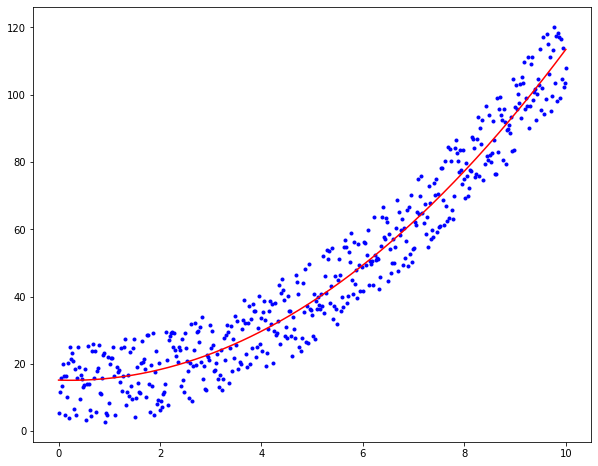

In [67]:
#we create a known function with random error attached to make it difficult to use interpolation
x = np.linspace(0, 10, 500 )
y = 1 + x*x +  np.random.random(len(x))*25
# We are looking at a quadratic, so we need 3 columns to define the parameters
A = np.vstack([x*x,x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

#perform a standard linear algebra inverse
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x*x+alpha[1]*x + alpha[2], 'r')
plt.show()


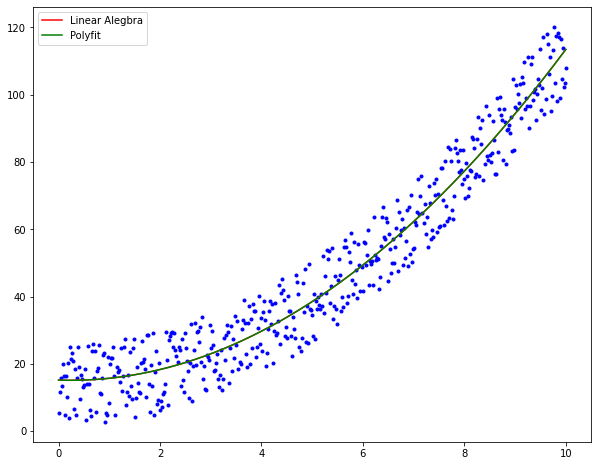

In [68]:
#Python also includes multiple functions for performing simple and more complicated fits

p=np.polyfit(x,y,2)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x*x+alpha[1]*x + alpha[2], 'r',label= 'Linear Alegbra')
plt.plot(x, p[0]*x*x+p[1]*x + p[2], 'g', label='Polyfit' )
plt.legend()
plt.show()

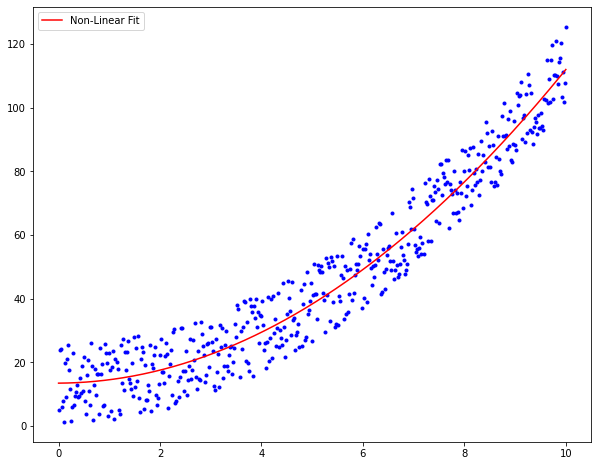

In [78]:
#numerical fits can also be made 

def func(x, a, b,c):
    y = a*x*x  + b*x +c
    return y
x = np.linspace(0, 10, 500 )

#this function requires y to be a simple column of data, so we rebuild our data
y = 1 + x*x +  np.random.random(len(x))*25
alpha = optimize.curve_fit(func, xdata = x, ydata = y, p0=[0,0,0])[0]

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, np.poly1d(alpha)(x), 'r',label= 'Non-Linear Fit')
plt.legend()
plt.show()